In [1]:
# Copyright (c) 2016-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree. An additional grant
# of patent rights can be found in the PATENTS file in the same directory.

import numpy as np
import time
import inspect

from scipy.sparse import csr_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.neighbors import LSHForest
from sklearn.feature_extraction import DictVectorizer

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import pysparnn
import pysparnn_utils

In [3]:
dataset = fetch_20newsgroups(subset='all', shuffle=True)

docs = np.array([x.split() for x in dataset.data])
datas = np.array(range(len(docs)))

In [4]:
print 'Num docs: {}'.format(len(docs))
print 'Avg doc length: {}'.format(np.mean([len(x) for x in docs]))
words = set()
for doc in docs:
    words.update(doc)
print 'Num unique words: {}'.format(len(words))

Num docs: 18846
Avg doc length: 283.656001273
Num unique words: 386410


In [14]:
res = []

for n in np.linspace(10, 200, 15):
    text_search = pysparnn_utils.PySparNNTextSearch(docs, range(len(docs)), n)
    snn_time, snn_accuracy = pysparnn_utils.identity_benchmark(text_search, docs, docs_per_query=1)
    res.append({'matrix_size':n, 'time':snn_time, 'accuracy':snn_accuracy})

for n in np.linspace(210, 2000, 15):
    text_search = pysparnn_utils.PySparNNTextSearch(docs, range(len(docs)), n)
    snn_time, snn_accuracy = pysparnn_utils.identity_benchmark(text_search, docs, docs_per_query=1)
    res.append({'matrix_size':n, 'time':snn_time, 'accuracy':snn_accuracy})

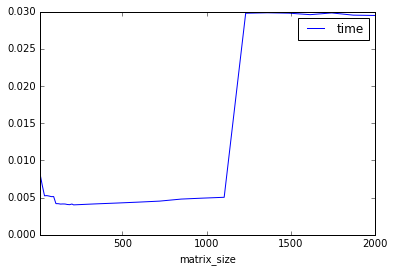

In [16]:
pd.DataFrame(res).plot(x='matrix_size', y='time')